## Find Homorhythm


#### This function predicts homorhythmic passages in a given piece.
    
The method follows various stages:
- gets **durational ngrams**, and finds passages in which these are the same in **more than two voices at a given offsets**
- gets syllables at every offset, and identifies **passages where more than two voices are singing the same lyrics**
- checks the **number of active voices** (thus eliminating places where some voices have rests)

In [17]:
import intervals
from intervals import * 
from intervals import main_objs
import pandas as pd
import re
from ipywidgets import interact
from pandas.io.json import json_normalize
from IPython.display import display
import os
import numpy
import itertools

MYDIR = ("saved_csv")
CHECK_FOLDER = os.path.isdir(MYDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MYDIR)
    print("created folder : ", MYDIR)

else:
    print(MYDIR, "folder already exists.")
    
MUSDIR = ("Music_Files")
CHECK_FOLDER = os.path.isdir(MUSDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MUSDIR)
    print("created folder : ", MUSDIR)

else:
    print(MUSDIR, "folder already exists.")

saved_csv folder already exists.
Music_Files folder already exists.


## Import Your Piece

- Here you will want to select the appropriate 'prefix' that identifies the location of your file.
- `'Music_Files/'` is for files in the local notebook; `'https://crimproject.org/mei/'` is for the files on CRIM.
- Then provide the full name (and extension) of your music file, such as `'CRIM_Model_0038.mei'`

In [18]:
# Select a prefix:

# prefix = 'Music_Files/'
prefix = 'https://crimproject.org/mei/'

# Add your filename here

mei_file = 'CRIM_Model_0002.mei'

url = prefix + mei_file

piece = importScore(url)

print(piece.metadata)

Previously imported piece detected.
{'title': 'O gente brunette', 'composer': 'Thomas Champion'}


### Find Homorhythm

#### This function predicts homorhythmic passages in a given piece.
    
The method follows various stages:
- gets **durational ngrams**, and finds passages in which these are the same in **more than two voices at a given offsets**
- gets **lyric ngrams**, and finds passages in which the **same sequence of two syllables** are heard successively in at least two voices at the **same offsets**.
- checks the **number of active voices** (so that we can count the number moving on coordinated homorhythm

to call the method:  

`homorhythm = piece.homorhythm2()`

##### View Score Excerpts with Verovio in the NB

It is also possible to display the results of the Homorhythm method in the Notebook with Verovio. The excerpts vary in length. Sometimes the same measure is part of overlapping groups--more work is pending to solve this problem.

The function also displays metadata about each excerpt: piece ID, composer, title, measures, and the minimum and maximum of voices in each passage moving in coordinated durations and syllables.

To use the function, pass the piece, homorhythm data frame, url of the piece, and mei_file name (all loaded in the first part of this notebook) as follows:

`verovio_print_homorhythm(piece, homorhythm, prefix, url, mei_file)`

* Read the documentation:  `print(piece.homorhythm.__doc__)`



In [19]:
homorhythm = piece.homorhythm()



In [20]:
verovio_print_homorhythm(piece, homorhythm, prefix, url, mei_file)

Results:
MEI File:  CRIM_Model_0002.mei
Thomas Champion
O gente brunette
HR Start Measure:  1
HR Stop Measure:  1
Minimum Number of HR Voices:  4
Maximum Number of HR Voices:  4


[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'


Results:
MEI File:  CRIM_Model_0002.mei
Thomas Champion
O gente brunette
HR Start Measure:  1
HR Stop Measure:  2
Minimum Number of HR Voices:  2
Maximum Number of HR Voices:  4


Results:
MEI File:  CRIM_Model_0002.mei
Thomas Champion
O gente brunette
HR Start Measure:  4
HR Stop Measure:  6
Minimum Number of HR Voices:  2
Maximum Number of HR Voices:  4


Results:
MEI File:  CRIM_Model_0002.mei
Thomas Champion
O gente brunette
HR Start Measure:  6
HR Stop Measure:  6
Minimum Number of HR Voices:  4
Maximum Number of HR Voices:  4


Results:
MEI File:  CRIM_Model_0002.mei
Thomas Champion
O gente brunette
HR Start Measure:  6
HR Stop Measure:  7
Minimum Number of HR Voices:  2
Maximum Number of HR Voices:  4


Results:
MEI File:  CRIM_Model_0002.mei
Thomas Champion
O gente brunette
HR Start Measure:  6
HR Stop Measure:  9
Minimum Number of HR Voices:  2
Maximum Number of HR Voices:  4


Results:
MEI File:  CRIM_Model_0002.mei
Thomas Champion
O gente brunette
HR Start Measure:  11
HR Stop Measure:  12
Minimum Number of HR Voices:  4
Maximum Number of HR Voices:  4


Results:
MEI File:  CRIM_Model_0002.mei
Thomas Champion
O gente brunette
HR Start Measure:  11
HR Stop Measure:  13
Minimum Number of HR Voices:  4
Maximum Number of HR Voices:  4


Results:
MEI File:  CRIM_Model_0002.mei
Thomas Champion
O gente brunette
HR Start Measure:  12
HR Stop Measure:  14
Minimum Number of HR Voices:  4
Maximum Number of HR Voices:  4


Results:
MEI File:  CRIM_Model_0002.mei
Thomas Champion
O gente brunette
HR Start Measure:  13
HR Stop Measure:  15
Minimum Number of HR Voices:  4
Maximum Number of HR Voices:  4


Results:
MEI File:  CRIM_Model_0002.mei
Thomas Champion
O gente brunette
HR Start Measure:  14
HR Stop Measure:  15
Minimum Number of HR Voices:  4
Maximum Number of HR Voices:  4


Results:
MEI File:  CRIM_Model_0002.mei
Thomas Champion
O gente brunette
HR Start Measure:  14
HR Stop Measure:  17
Minimum Number of HR Voices:  4
Maximum Number of HR Voices:  4


Results:
MEI File:  CRIM_Model_0002.mei
Thomas Champion
O gente brunette
HR Start Measure:  15
HR Stop Measure:  18
Minimum Number of HR Voices:  4
Maximum Number of HR Voices:  4


Results:
MEI File:  CRIM_Model_0002.mei
Thomas Champion
O gente brunette
HR Start Measure:  17
HR Stop Measure:  19
Minimum Number of HR Voices:  3
Maximum Number of HR Voices:  4


Results:
MEI File:  CRIM_Model_0002.mei
Thomas Champion
O gente brunette
HR Start Measure:  18
HR Stop Measure:  19
Minimum Number of HR Voices:  3
Maximum Number of HR Voices:  4


Results:
MEI File:  CRIM_Model_0002.mei
Thomas Champion
O gente brunette
HR Start Measure:  18
HR Stop Measure:  20
Minimum Number of HR Voices:  3
Maximum Number of HR Voices:  4


Results:
MEI File:  CRIM_Model_0002.mei
Thomas Champion
O gente brunette
HR Start Measure:  19
HR Stop Measure:  20
Minimum Number of HR Voices:  3
Maximum Number of HR Voices:  4


Results:
MEI File:  CRIM_Model_0002.mei
Thomas Champion
O gente brunette
HR Start Measure:  20
HR Stop Measure:  21
Minimum Number of HR Voices:  4
Maximum Number of HR Voices:  4


Results:
MEI File:  CRIM_Model_0002.mei
Thomas Champion
O gente brunette
HR Start Measure:  21
HR Stop Measure:  21
Minimum Number of HR Voices:  4
Maximum Number of HR Voices:  4


Results:
MEI File:  CRIM_Model_0002.mei
Thomas Champion
O gente brunette
HR Start Measure:  23
HR Stop Measure:  23
Minimum Number of HR Voices:  4
Maximum Number of HR Voices:  4


Results:
MEI File:  CRIM_Model_0002.mei
Thomas Champion
O gente brunette
HR Start Measure:  23
HR Stop Measure:  24
Minimum Number of HR Voices:  4
Maximum Number of HR Voices:  4


Results:
MEI File:  CRIM_Model_0002.mei
Thomas Champion
O gente brunette
HR Start Measure:  24
HR Stop Measure:  24
Minimum Number of HR Voices:  4
Maximum Number of HR Voices:  4


Results:
MEI File:  CRIM_Model_0002.mei
Thomas Champion
O gente brunette
HR Start Measure:  24
HR Stop Measure:  25
Minimum Number of HR Voices:  2
Maximum Number of HR Voices:  4


Results:
MEI File:  CRIM_Model_0002.mei
Thomas Champion
O gente brunette
HR Start Measure:  27
HR Stop Measure:  29
Minimum Number of HR Voices:  2
Maximum Number of HR Voices:  4


Results:
MEI File:  CRIM_Model_0002.mei
Thomas Champion
O gente brunette
HR Start Measure:  29
HR Stop Measure:  29
Minimum Number of HR Voices:  4
Maximum Number of HR Voices:  4


Results:
MEI File:  CRIM_Model_0002.mei
Thomas Champion
O gente brunette
HR Start Measure:  29
HR Stop Measure:  30
Minimum Number of HR Voices:  2
Maximum Number of HR Voices:  4


Results:
MEI File:  CRIM_Model_0002.mei
Thomas Champion
O gente brunette
HR Start Measure:  29
HR Stop Measure:  32
Minimum Number of HR Voices:  2
Maximum Number of HR Voices:  4


### Other methods for Filtering HR

* Below we explore ways of using HR results in various ways:
    - Filtering by the number voices singing a given syllable
    - Find FULL HR: when all voices have same syllables and same durations
    - Find STAGGERED HR: when some subset to have the same syllables
    - Filter modular ngrams according to the offset list of the HR passages (in effect:  the counterpoint for HR)
    - Count the modules appearance in those HR passages (to find ones that repeat)

In [21]:
# For number of voices with complete index of measures beats AND offsets
hr = homorhythm
hr_full = hr[hr['active_syll_voices'] == 4]
hr_full.head()


active_voices  number_dur_ngrams    Superius Contratenor  \
Measure Beat Offset                                                             
1       1.0  0.0               4.0                1.0    (O, gen)    (O, gen)   
        2.0  1.0               4.0                1.0   (gen, te)   (gen, te)   
        3.0  2.0               4.0                1.0   (te, bru)   (te, bru)   
        4.0  3.0               4.0                1.0  (bru, net)  (bru, net)   
        5.0  4.0               4.0                1.0   (net, te)   (net, te)   

                          Tenor      Bassus  \
Measure Beat Offset                           
1       1.0  0.0       (O, gen)    (O, gen)   
        2.0  1.0      (gen, te)   (gen, te)   
        3.0  2.0      (te, bru)   (te, bru)   
        4.0  3.0     (bru, net)  (bru, net)   
        5.0  4.0      (net, te)   (net, te)   

                                                         syllable_set  \
Measure Beat Offset                                                     
1       1.0  0.0             [(O, gen), (O, gen), (O, gen), (O, gen)]   
        2.0  1.0         [(gen, te), (gen, te), (gen, te), (gen, te)]   
        3.0  2.0         [(te, bru), (te, bru), (te, bru), (te, bru)]   
        4.0  3.0     [(bru, net), (bru, net), (bru, net), (bru, net)]   
        5.0  4.0         [(net, te), (net, te), (net, te), (net, te)]   

                     count_lyr_ngrams  active_syll_voices voice_match  
Measure Beat Offset                                                    
1       1.0  0.0                  1.0                 4.0        True  
        2.0  1.0                  1.0                 4.0        True  
        3.0  2.0                  1.0                 4.0        True  
        4.0  3.0                  1.0                 4.0        True  
        5.0  4.0                  1.0                 4.0        True

In [22]:
# FULL HR is when all voices have same syllables and same durations
# STAGGERED HR allows for some some subset to have the same syllables

hr_full = homorhythm[homorhythm['voice_match'] == True]

hr_staggered = homorhythm[homorhythm['voice_match'] == False]
hr_full
hr_staggered

,,,active_voices,number_dur_ngrams,Superius,Contratenor,Tenor,Bassus,syllable_set,count_lyr_ngrams,active_syll_voices,voice_match
Measure,Beat,Offset,,,,,,,,,,
4,4.0,27.0,3.0,1.0,NaN,"(ras, tu)","(ras, tu)",NaN,"[(ras, tu), (ras, tu)]",1.0,2.0,False
9,8.0,71.0,3.0,1.0,NaN,"(mon, aise)","(mon, aise)",NaN,"[(mon, aise), (mon, aise)]",1.0,2.0,False
27,4.0,211.0,3.0,1.0,NaN,"(ras, tu)","(ras, tu)",NaN,"[(ras, tu), (ras, tu)]",1.0,2.0,False
32,8.0,255.0,3.0,1.0,NaN,"(mon, aise)","(mon, aise)",NaN,"[(mon, aise), (mon, aise)]",1.0,2.0,False


In [23]:
# get the offset numbers of each passage as a list
hr_list = hr_full.index.get_level_values(2).to_list()
# filter modular ngrams according to the offset list
# modular ngrams for complete piece
ng = piece.ngrams()
ng_hr = ng.filter(items = hr_list, axis=0)
piece.detailIndex(ng_hr, offset=True)

Bassus_Tenor Bassus_Contratenor   Bassus_Superius  \
Measure Beat Offset                                                       
1       1.0  0.0      3_-2, 3_2, 3      5_-2, 10_2, 8   12_-2, 13_2, 12   
        2.0  1.0      3_2, 3_-3, 6     10_2, 8_-3, 10   13_2, 12_-3, 15   
        3.0  2.0     3_-3, 6_-2, 8    8_-3, 10_-2, 10  12_-3, 15_-2, 17   
        4.0  3.0      6_-2, 8_3, 6     10_-2, 10_3, 8   15_-2, 17_3, 17   
        5.0  4.0      8_3, 6_-2, 8     10_3, 8_-2, 10   17_3, 17_-2, 17   
...                            ...                ...               ...   
29      7.0  230.0   3_-3, 6_-2, 8    8_-3, 10_-2, 10  12_-3, 15_-2, 17   
        8.0  231.0    6_-2, 8_3, 6     10_-2, 10_3, 8   15_-2, 17_3, 17   
30      1.0  232.0    8_3, 6_-2, 8     10_3, 8_-2, 10   17_3, 17_-2, 17   
        7.0  238.0    6_3, 3_-4, 5                NaN   16_3, 13_-4, 17   
31      4.0  243.0             NaN    12_5, 8_Held, 9    15_5, 12_1, 10   

                    Tenor_Contratenor    Tenor_Superius Contratenor_Superius  
Measure Beat Offset                                                           
1       1.0  0.0         3_-2, 8_2, 6   10_-2, 11_2, 10         8_5, 4_-2, 5  
        2.0  1.0          8_2, 6_2, 5    11_2, 10_2, 10         4_-2, 5_1, 6  
        3.0  2.0          6_2, 5_2, 3    10_2, 10_2, 10         5_1, 6_-2, 8  
        4.0  3.0          5_2, 3_1, 3    10_2, 10_1, 12        6_-2, 8_1, 10  
        5.0  4.0          3_1, 3_2, 3    10_1, 12_2, 10         8_1, 10_2, 8  
...                               ...               ...                  ...  
29      7.0  230.0        6_2, 5_2, 3    10_2, 10_2, 10         5_1, 6_-2, 8  
        8.0  231.0        5_2, 3_1, 3    10_2, 10_1, 12        6_-2, 8_1, 10  
30      1.0  232.0        3_1, 3_2, 3    10_1, 12_2, 10         8_1, 10_2, 8  
        7.0  238.0      6_-2, 6_-2, 8  11_-2, 11_-2, 13         6_-2, 6_2, 6  
31      4.0  243.0                NaN               NaN       4_Held, 5_2, 4  

[63 rows x 6 columns]

In [24]:
# count the occurences of each
ng_hr.stack().value_counts().to_frame()

,0
"3_1, 3_2, 3",6
"3_-2, 8_2, 6",4
"8_-3, 10_-2, 10",4
"6_2, 5_2, 3",4
"10_2, 8_-3, 10",4
...,...
"10_-5, 15_4, 12",1
"3_1, 4_-2, 4",1
"5_-2, 6_-2, 6",1
"10_-3, 12_2, 10",1


In [25]:
# search for the module given in "contains(YOUR_MODULE)" below

ngrams = piece.ngrams()
ngrams
filtered_ngrams = ngrams[ngrams.apply(lambda x: x.astype(str).str.contains('8_1, 8_1, 8').any(), axis=1)]#.copy()
filtered_ngrams

,Bassus_Tenor,Bassus_Contratenor,Bassus_Superius,Tenor_Contratenor,Tenor_Superius,Contratenor_Superius


In [26]:
# now find the offsets of ONLY the staggered or full HR passages
hr_list = hr_staggered.index.get_level_values(2).to_list()
hr_list
# and refine the set of modular ngrams to include only the Full or Staggered
hr_list = hr_full.index.get_level_values(2).to_list()
ng = piece.ngrams()
hr_ng = ng.filter(hr_list, axis=0)
hr_ng


,Bassus_Tenor,Bassus_Contratenor,Bassus_Superius,Tenor_Contratenor,Tenor_Superius,Contratenor_Superius
0.0,"3_-2, 3_2, 3","5_-2, 10_2, 8","12_-2, 13_2, 12","3_-2, 8_2, 6","10_-2, 11_2, 10","8_5, 4_-2, 5"
1.0,"3_2, 3_-3, 6","10_2, 8_-3, 10","13_2, 12_-3, 15","8_2, 6_2, 5","11_2, 10_2, 10","4_-2, 5_1, 6"
2.0,"3_-3, 6_-2, 8","8_-3, 10_-2, 10","12_-3, 15_-2, 17","6_2, 5_2, 3","10_2, 10_2, 10","5_1, 6_-2, 8"
3.0,"6_-2, 8_3, 6","10_-2, 10_3, 8","15_-2, 17_3, 17","5_2, 3_1, 3","10_2, 10_1, 12","6_-2, 8_1, 10"
4.0,"8_3, 6_-2, 8","10_3, 8_-2, 10","17_3, 17_-2, 17","3_1, 3_2, 3","10_1, 12_2, 10","8_1, 10_2, 8"
...,...,...,...,...,...,...
230.0,"3_-3, 6_-2, 8","8_-3, 10_-2, 10","12_-3, 15_-2, 17","6_2, 5_2, 3","10_2, 10_2, 10","5_1, 6_-2, 8"
231.0,"6_-2, 8_3, 6","10_-2, 10_3, 8","15_-2, 17_3, 17","5_2, 3_1, 3","10_2, 10_1, 12","6_-2, 8_1, 10"
232.0,"8_3, 6_-2, 8","10_3, 8_-2, 10","17_3, 17_-2, 17","3_1, 3_2, 3","10_1, 12_2, 10","8_1, 10_2, 8"
238.0,"6_3, 3_-4, 5",NaN,"16_3, 13_-4, 17","6_-2, 6_-2, 8","11_-2, 11_-2, 13","6_-2, 6_2, 6"


### Here We Explain the Steps In the HR Methods

In [27]:
# function for removing non alpha characters from texts

def alpha_only(value):
    if isinstance(value, str):
        return re.sub(r'[^a-zA-Z]', '', value)
    else:
        return value

In [12]:
# The HR Function

def homorhythm_demo(piece):
    """
    This function predicts homorhythmic passages in a given piece.
    The method follows various stages:

    gets durational ngrams, and finds passages in which these are the same in more than two voices at a given offsets
    gets syllables at every offset, and identifies passages where more than two voices are singing the same lyrics_hr
    checks the number of active voices (thus eliminating places where some voices have rests)
    """
    # active version with lyric ngs
    nr = piece.notes()
    dur = piece.durations(df=nr)
    ng = piece.ngrams(df=dur, n=2)
    dur_ngrams = []
    for index, rows in ng.iterrows():
         dur_ngrams_no_nan = [x for x in rows if pd.isnull(x) == False]
         dur_ngrams.append(dur_ngrams_no_nan)

    ng['dur_ngrams'] = dur_ngrams

    ng['active_voices'] = ng['dur_ngrams'].apply(len)
    ng['number_dur_ngrams'] = ng['dur_ngrams'].apply(set).apply(len)
    ng = ng[(ng['number_dur_ngrams'] < 2) & (ng['active_voices'] > 1)]

     # get the lyrics as ngrams to match the durations
    lyrics = piece.lyrics()
    lyrics = lyrics.applymap(piece._alpha_only)
    lyrics_ng = piece.ngrams(df=lyrics, n=2)

    # count the lyric_ngrams at each position
    syll_set = []
    for index, rows in lyrics_ng.iterrows():
         syll_no_nan = [z for z in rows if pd.isnull(z) == False]
         syll_set.append(syll_no_nan)
    lyrics_ng['syllable_set'] = syll_set
    lyrics_ng["count_lyr_ngrams"] = lyrics_ng["syllable_set"].apply(set).apply(len)

    # and the number of active voices
    lyrics_ng['active_syll_voices'] = lyrics_ng['syllable_set'].apply(len)

    # finally predict the hr moments, based on the number of both active voices (> 1) and count of lyric ngrams (1)
    hr_sylls_mask = lyrics_ng[(lyrics_ng['active_syll_voices'] > 1) & (lyrics_ng['count_lyr_ngrams'] < 2)]

    # combine of both dur_ng and lyric_ng to show passages where more than 2 voices have the same syllables and durations
    ng = ng[['active_voices', "number_dur_ngrams"]]
    hr = pd.merge(ng, hr_sylls_mask, left_index=True, right_index=True)
     # the intersection of coordinated durations and coordinate lyrics
    hr['voice_match'] = hr['active_voices'] == hr['active_syll_voices']
    result = piece.detailIndex(hr, offset=True)
    return result

In [8]:
# Getting the ngrams for durations

nr = piece.notes()
dur = piece.durations(df=nr)
ng = piece.ngrams(df=dur, n=2)
ng

,Discantus,Altus,Tenor,Bassus
0.0,"(8.0, 4.0)","(4.0, 8.0)","(32.0, 8.0)","(36.0, 8.0)"
4.0,NaN,"(8.0, 4.0)",NaN,NaN
8.0,"(4.0, 4.0)",NaN,NaN,NaN
12.0,"(4.0, 6.0)","(4.0, 4.0)",NaN,NaN
16.0,"(6.0, 2.0)","(4.0, 6.0)",NaN,NaN
...,...,...,...,...
847.0,"(1.0, 2.0)",NaN,"(1.0, 2.0)",NaN
848.0,"(2.0, 4.0)","(8.0, 16.0)","(2.0, 2.0)","(8.0, 16.0)"
850.0,"(4.0, 2.0)",NaN,"(2.0, 4.0)",NaN
852.0,NaN,NaN,"(4.0, 16.0)",NaN


In [14]:
# apply the demonstration function to the piece

homorhythm_demo(piece)

active_voices  number_dur_ngrams    Discantus  \
Measure Beat Offset                                                  
29      2.0  226.0             2.0                1.0          NaN   
35      3.0  276.0             4.0                1.0    (mus, Do)   
36      1.0  280.0             4.0                1.0     (Do, mi)   
37      2.0  290.0             2.0                1.0          NaN   
        3.0  292.0             2.0                1.0    (de, dit)   
38      3.0  300.0             4.0                1.0    (dit, Do)   
39      3.0  308.0             4.0                1.0     (Do, mi)   
40      2.0  314.0             4.0                1.0    (mi, nus)   
        3.0  316.0             4.0                1.0    (nus, ab)   
41      1.0  320.0             4.0                1.0    (ab, stu)   
54      1.0  424.0             2.0                1.0   (est, sit)   
55      1.0  432.0             4.0                1.0    (sit, no)   
56      1.0  440.0             4.0                1.0    (no, men)   
57      4.0  454.0             3.0                1.0          NaN   
58      1.0  456.0             4.0                1.0     (ni, be)   
59      2.0  466.0             2.0                1.0   (di, ctum)   
        3.0  468.0             2.0                1.0          NaN   
64      2.0  506.0             3.0                1.0    (e, gres)   
        3.0  508.0             3.0                1.0  (gres, sus)   
66      2.0  522.0             2.0                1.0          NaN   
        3.0  524.0             3.0                1.0          NaN   
71      4.0  566.0             2.0                1.0          NaN   
72      2.0  570.0             2.0                1.0    (re, ver)   
76      1.0  600.0             4.0                1.0     (Do, mi)   
77      2.0  610.0             2.0                1.0          NaN   
        3.0  612.0             2.0                1.0    (de, dit)   
78      3.0  620.0             4.0                1.0    (dit, Do)   
79      3.0  628.0             4.0                1.0     (Do, mi)   
80      2.0  634.0             4.0                1.0    (mi, nus)   
        3.0  636.0             4.0                1.0    (nus, ab)   
81      1.0  640.0             4.0                1.0    (ab, stu)   
94      1.0  744.0             2.0                1.0   (est, sit)   
95      1.0  752.0             4.0                1.0    (sit, no)   
96      1.0  760.0             4.0                1.0    (no, men)   
97      4.0  774.0             4.0                1.0          NaN   
98      1.0  776.0             4.0                1.0     (ni, be)   
99      2.0  786.0             2.0                1.0   (di, ctum)   
101     1.0  800.0             4.0                1.0  (ctum, sit)   
102     1.0  808.0             4.0                1.0    (sit, no)   
103     1.0  816.0             4.0                1.0    (no, men)   
104     4.0  830.0             4.0                1.0          NaN   
105     1.0  832.0             4.0                1.0     (ni, be)   
106     2.0  842.0             2.0                1.0   (di, ctum)   

                           Altus        Tenor       Bassus  \
Measure Beat Offset                                          
29      2.0  226.0           NaN     (a, mus)     (a, mus)   
35      3.0  276.0     (mus, Do)          NaN          NaN   
36      1.0  280.0      (Do, mi)     (Do, mi)     (Do, mi)   
37      2.0  290.0     (de, dit)    (de, dit)          NaN   
        3.0  292.0           NaN          NaN    (de, dit)   
38      3.0  300.0     (dit, Do)    (dit, Do)    (dit, Do)   
39      3.0  308.0      (Do, mi)     (Do, mi)     (Do, mi)   
40      2.0  314.0     (mi, nus)    (mi, nus)    (mi, nus)   
        3.0  316.0     (nus, ab)    (nus, ab)    (nus, ab)   
41      1.0  320.0     (ab, stu)    (ab, stu)    (ab, stu)   
54      1.0  424.0    (est, sit)          NaN          NaN   
55      1.0  432.0     (sit, no)    (sit, no)    (sit, no)   
56

In [162]:
hr = find_hr(piece)
hr.head(3)

hr['voice_match'] = hr['active_voices'] == hr['active_syll_voices']
hr = hr.groupby('Measure').first()
ind_list = hr.index.to_list()
for i in range(len(ind_list)-1):
    if ind_list[i+1] - ind_list[i] == 2:
        new_index = ind_list[i] + 1
        hr.loc[new_index] = 'NaN', 'NaN', 'NaN', 'NaN'
#         print(out2.loc[new_index])
hr = hr.sort_index()
hr

,active_voices,number_dur_ngrams,active_syll_voices,voice_match
Measure,,,,
31,2.0,1.0,2.0,True
32,2.0,1.0,2.0,True
33,2.0,1.0,2.0,True
34,NaN,NaN,NaN,NaN
35,2.0,1.0,2.0,True
38,2.0,1.0,2.0,True
39,3.0,1.0,3.0,True
40,4.0,1.0,4.0,True
41,4.0,1.0,4.0,True


Results:
MEI File:  CRIM_Model_0008.mei
Josquin Des Prés
Ave Maria
HR Start Measure:  31
HR Stop Measure:  35
Active Voices:  2.0
Type:  Full Homorhythm


[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] 4 time pointing element(s) could not be matched in measure m-4149
[Warning] 4 time pointing element(s) could not be matched in measure m-4132
[Warning] 4 time pointing element(s) could not be matched in measure m-4098


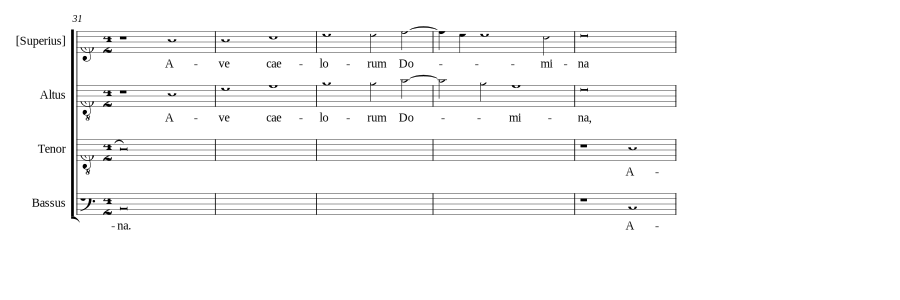

Results:
MEI File:  CRIM_Model_0008.mei
Josquin Des Prés
Ave Maria
HR Start Measure:  38
HR Stop Measure:  41
Active Voices:  2.0
Type:  Full Homorhythm


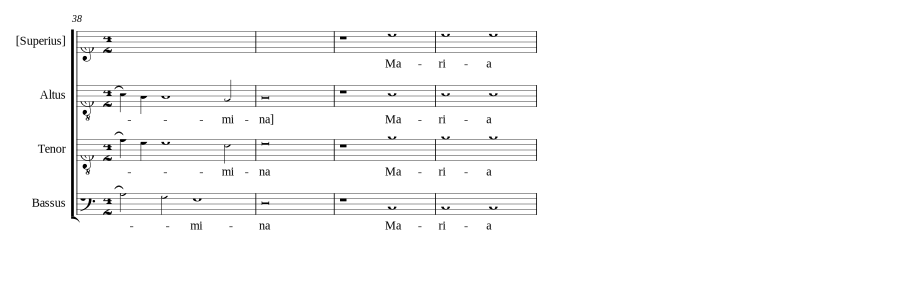

Results:
MEI File:  CRIM_Model_0008.mei
Josquin Des Prés
Ave Maria
HR Start Measure:  52
HR Stop Measure:  52
Active Voices:  2.0
Type:  Staggered Homorhythm


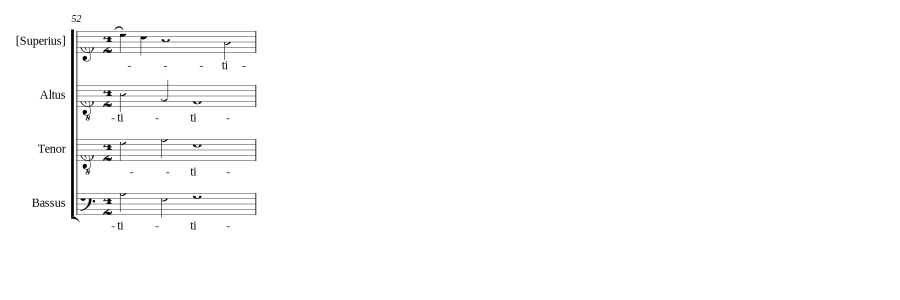

Results:
MEI File:  CRIM_Model_0008.mei
Josquin Des Prés
Ave Maria
HR Start Measure:  76
HR Stop Measure:  81
Active Voices:  2.0
Type:  Full Homorhythm


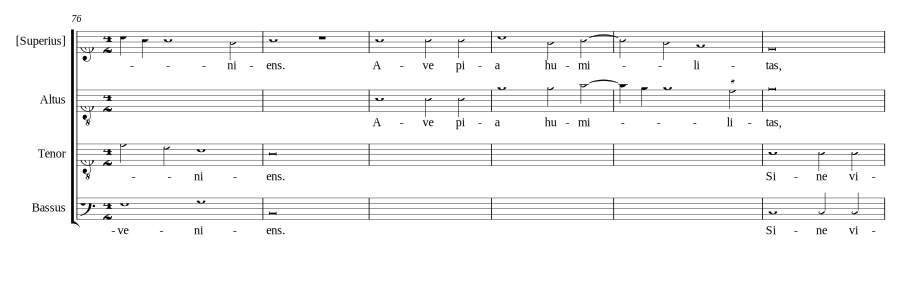

Results:
MEI File:  CRIM_Model_0008.mei
Josquin Des Prés
Ave Maria
HR Start Measure:  93
HR Stop Measure:  102
Active Voices:  2.0
Type:  Full Homorhythm


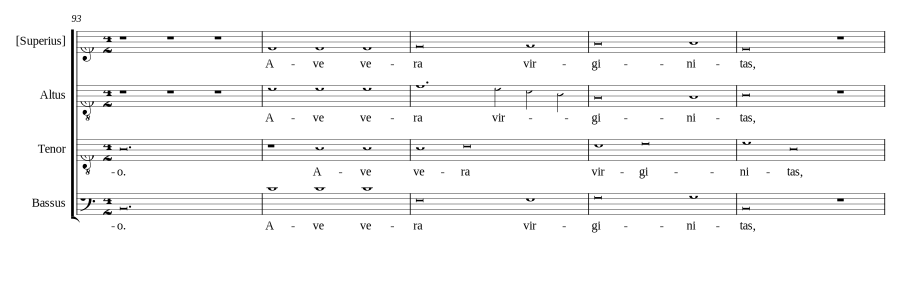

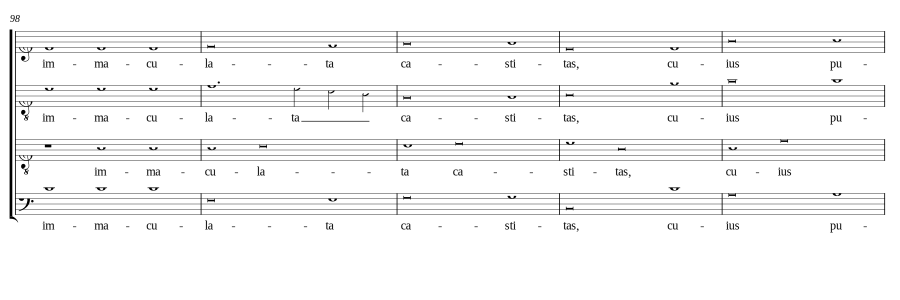

Results:
MEI File:  CRIM_Model_0008.mei
Josquin Des Prés
Ave Maria
HR Start Measure:  112
HR Stop Measure:  112
Active Voices:  2.0
Type:  Full Homorhythm


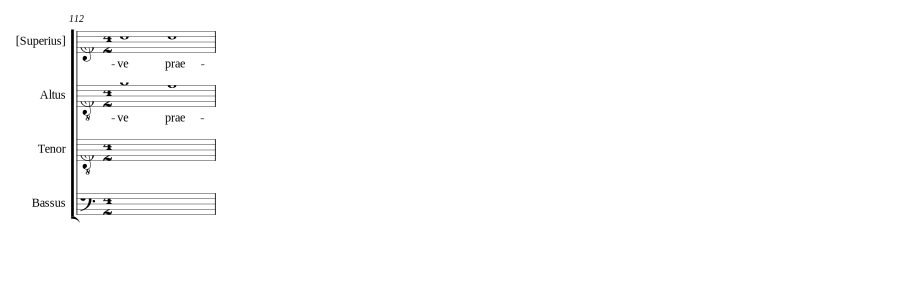

Results:
MEI File:  CRIM_Model_0008.mei
Josquin Des Prés
Ave Maria
HR Start Measure:  115
HR Stop Measure:  115
Active Voices:  2.0
Type:  Staggered Homorhythm


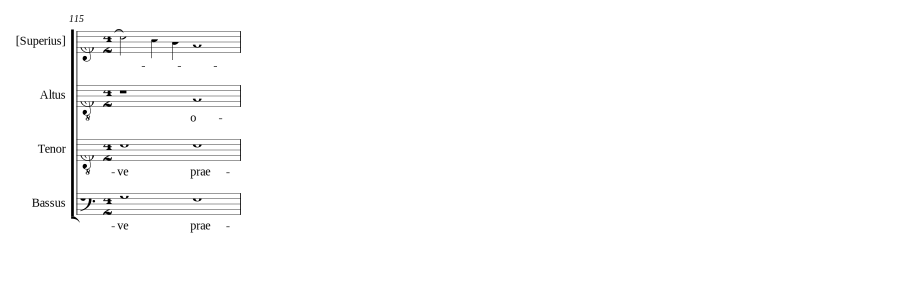

Results:
MEI File:  CRIM_Model_0008.mei
Josquin Des Prés
Ave Maria
HR Start Measure:  123
HR Stop Measure:  123
Active Voices:  2.0
Type:  Staggered Homorhythm


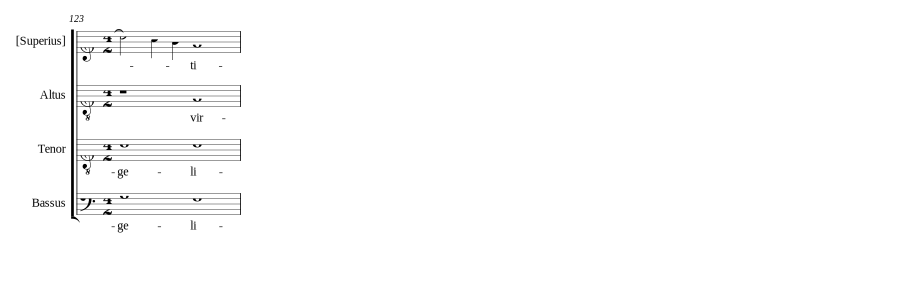

Results:
MEI File:  CRIM_Model_0008.mei
Josquin Des Prés
Ave Maria
HR Start Measure:  127
HR Stop Measure:  127
Active Voices:  2.0
Type:  Full Homorhythm


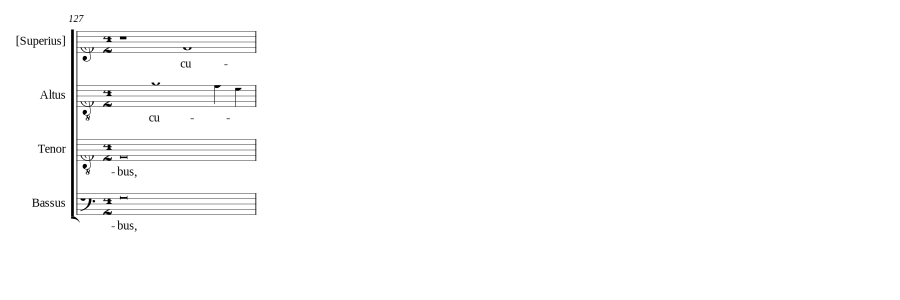

Results:
MEI File:  CRIM_Model_0008.mei
Josquin Des Prés
Ave Maria
HR Start Measure:  141
HR Stop Measure:  151
Active Voices:  3.0
Type:  Full Homorhythm


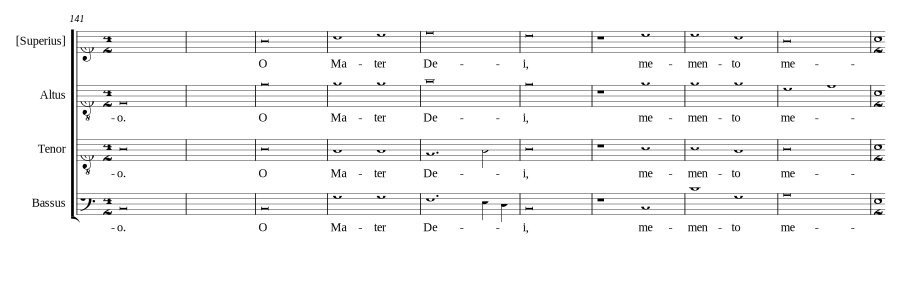

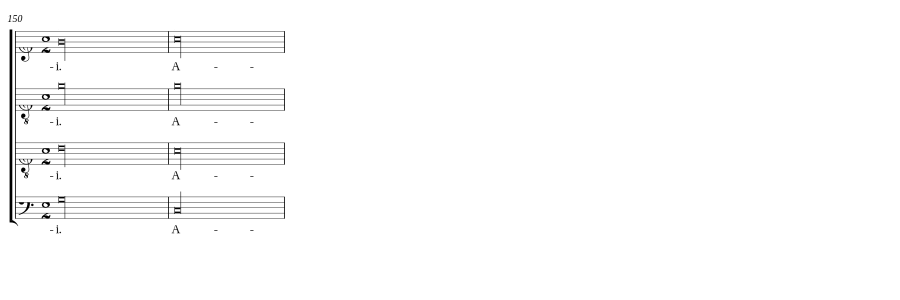

In [161]:
# How Verovio Works for HR

response = requests.get(url)
fetched_mei_string = response.text
tk = verovio.toolkit()
tk.loadData(fetched_mei_string)
tk.setScale(30)
tk.setOption( "pageHeight", "1000" )
tk.setOption( "pageWidth", "3000" )

# Now get meas ranges and number of active voices
mg = list(hr.index.get_level_values('Measure').tolist())
#Get the groupings of consecutive items
li = [list(item) for item in consecutive_groups(mg)]

#Use the result to get range groupings
meas_spans = [ [item[0],item[-1]] if len(item) > 1 else [item[0]] for item in li]
for span in meas_spans:
    mr = str(span[0]) + "-" + str(span[-1])
    mdict = {'measureRange': mr}
    count_hr_voices = hr.loc[span[0]]["active_syll_voices"]
    if hr.loc[span[0]]["voice_match"] == True:
        hr_type = "Full Homorhythm"
    else:
        hr_type = "Staggered Homorhythm"

    # select verovio measures and redo layout
    tk.select(str(mdict))
    tk.redoLayout()

    # get the number of pages and display the music
    print("Results:")
    count = tk.getPageCount()
    print("MEI File: ", mei_file)
    print(piece.metadata['composer'])
    print(piece.metadata['title'])
    print("HR Start Measure: ", span[0])
    print("HR Stop Measure: ", span[-1])
    print("Active Voices: ", count_hr_voices)
    print("Type: ", hr_type)
    for c in range(1, count + 1):
        music = tk.renderToSVG(c)
        
        display(SVG(music))

In [129]:
# Durations of Notes in Ngrams.  
# "2" is the minimum number to find passages of three HR chords.
nr = piece.notes()
dur = piece.durations(df=nr)
ng = piece.ngrams(df=dur, n=2)
ng


,[Superius],Altus,Tenor,Bassus
0.0,"(4.0, 8.0)","(16.0, 4.0)","(32.0, 4.0)","(48.0, 4.0)"
4.0,"(8.0, 4.0)",NaN,NaN,NaN
12.0,"(4.0, 4.0)",NaN,NaN,NaN
16.0,"(4.0, 4.0)","(4.0, 8.0)",NaN,NaN
20.0,"(4.0, 8.0)","(8.0, 4.0)",NaN,NaN
...,...,...,...,...
1244.0,"(4.0, 8.0)","(4.0, 4.0)","(4.0, 8.0)","(4.0, 8.0)"
1248.0,"(8.0, 16.0)","(4.0, 4.0)","(8.0, 16.0)","(8.0, 16.0)"
1252.0,NaN,"(4.0, 16.0)",NaN,NaN
1256.0,"(16.0, 16.0)","(16.0, 16.0)","(16.0, 16.0)","(16.0, 16.0)"


In [130]:
dur_ngrams = []

for index, rows in ng.iterrows():

    dur_ngrams_no_nan = [x for x in rows if pd.isnull(x) == False]
    dur_ngrams.append(dur_ngrams_no_nan)

ng['dur_ngrams'] = dur_ngrams
# ng['rest_count'] = rests
ng['active_voices'] = ng['dur_ngrams'].apply(len)
ng['number_dur_ngrams'] = ng['dur_ngrams'].apply(set).apply(len)
ng = ng[(ng['number_dur_ngrams'] <2) & (ng['active_voices'] > 2)]

ng.head()

,[Superius],Altus,Tenor,Bassus,dur_ngrams,active_voices,number_dur_ngrams
304.0,NaN,"(8.0, 4.0)","(8.0, 4.0)","(8.0, 4.0)","[(8.0, 4.0), (8.0, 4.0), (8.0, 4.0)]",3,1
312.0,NaN,"(4.0, 4.0)","(4.0, 4.0)","(4.0, 4.0)","[(4.0, 4.0), (4.0, 4.0), (4.0, 4.0)]",3,1
316.0,"(4.0, 4.0)","(4.0, 4.0)","(4.0, 4.0)","(4.0, 4.0)","[(4.0, 4.0), (4.0, 4.0), (4.0, 4.0), (4.0, 4.0)]",4,1
320.0,"(4.0, 4.0)","(4.0, 4.0)","(4.0, 4.0)","(4.0, 4.0)","[(4.0, 4.0), (4.0, 4.0), (4.0, 4.0), (4.0, 4.0)]",4,1
408.0,NaN,"(2.0, 2.0)","(2.0, 2.0)","(2.0, 2.0)","[(2.0, 2.0), (2.0, 2.0), (2.0, 2.0)]",3,1


In [131]:
# Checks for Rests in All Voices

pd.set_option('display.max_rows', None)
nr.ffill(inplace=True)
index_of_rests = []
rests = []
for index, rows in nr.iterrows():
    rest_test = [y for y in rows if y == "Rest"]
    rests.append(rest_test)
#     index_of_rests.append(index)
nr["rests"] = rests  
nr["rests_count"] = nr["rests"].apply(len)
full_stop = nr[(nr['rests_count'] > 1) ]
rests_with_mb = piece.detailIndex(full_stop)
full_stop.head()

,[Superius],Altus,Tenor,Bassus,rests,rests_count
0.0,G4,Rest,Rest,Rest,"[Rest, Rest, Rest]",3
4.0,C5,Rest,Rest,Rest,"[Rest, Rest, Rest]",3
12.0,C5,Rest,Rest,Rest,"[Rest, Rest, Rest]",3
16.0,D5,G3,Rest,Rest,"[Rest, Rest]",2
20.0,E5,C4,Rest,Rest,"[Rest, Rest]",2


In [132]:
# here we get the syllables sung at any offset
lyrics = piece.getLyric()
lyrics = lyrics.applymap(alpha_only)
cols = lyrics.columns
for col in cols:
    lyrics[col] = lyrics[col].str.lower()
syll_set = []
for index2, rows2 in lyrics.iterrows():
    syll_no_nan = [z for z in rows2 if pd.isnull(z) == False]
    syll_set.append(syll_no_nan)
#     print(syll_no_nan)
lyrics['syllable_set'] = syll_set
lyrics.head()

,[Superius],Altus,Tenor,Bassus,syllable_set
0.0,a,NaN,NaN,NaN,[a]
4.0,ve,NaN,NaN,NaN,[ve]
8.0,NaN,NaN,NaN,NaN,[]
12.0,ma,NaN,NaN,NaN,[ma]
16.0,ri,a,NaN,NaN,"[ri, a]"


In [135]:
# count of voices with syllables at this offset
lyrics['active_syll_voices'] = lyrics['syllable_set'].apply(len)
# count how _many_ syllables at this offset
lyrics['number_sylls'] = lyrics['syllable_set'].apply(set).apply(len)
# get count of possible hr passages (several voices with same syllable)
lyrics_hr = lyrics[(lyrics['active_syll_voices'] > 1) & (lyrics['number_sylls'] < 2)]
# piece.detailIndex(lyrics_hr, offset=True)
# lyrics['is_hr'] = np.where(lyrics['active_voices'] > 3) 
hr_sylls_mask = lyrics_hr["active_syll_voices"]
lyrics_hr
# hr_sylls_mask

,[Superius],Altus,Tenor,Bassus,syllable_set,active_syll_voices,number_sylls
244.0,a,a,NaN,NaN,"[a, a]",2,1
248.0,ve,ve,NaN,NaN,"[ve, ve]",2,1
252.0,cae,cae,NaN,NaN,"[cae, cae]",2,1
256.0,lo,lo,NaN,NaN,"[lo, lo]",2,1
260.0,rum,rum,NaN,NaN,"[rum, rum]",2,1
262.0,do,do,NaN,NaN,"[do, do]",2,1
272.0,na,na,NaN,NaN,"[na, na]",2,1
276.0,NaN,NaN,a,a,"[a, a]",2,1
280.0,NaN,NaN,ve,ve,"[ve, ve]",2,1
288.0,NaN,NaN,lo,lo,"[lo, lo]",2,1


In [12]:
# here we merge the syllable mask (where X voices have the same syllable)
# into the DF of the matching durations in 3+ voices
ng = ng[['active_voices', "number_dur_ngrams"]]
hr = pd.merge(ng, hr_sylls_mask, left_index=True, right_index=True)
piece.detailIndex(hr, offset=True)

active_voices  number_dur_ngrams  active_syll_voices
Measure Beat Offset                                                      
47      4.0  374.0             3.0                1.0                 3.0
48      2.0  378.0             3.0                1.0                 3.0
        3.0  380.0             3.0                1.0                 3.0
49      2.0  386.0             4.0                1.0                 4.0
50      4.0  398.0             5.0                1.0                 5.0
58      1.0  456.0             3.0                1.0                 3.0